In [1]:
from htmd import *
def analysis(sims,boot=0.8,clusters=1000,merge=5):
    metr = Metric(sims)
    metr.projection(MetricDistance('protein and name CA', 'resname MOL and noh', metric='contacts'))
    data = metr.project()
    data.fstep = 0.1
    data.plotTrajSizes()
    data.dropTraj()
    tica = TICA(data, 10)
    dataTica = tica.project(3)
    dataBoot = dataTica.bootstrap(0.8)
    dataBoot.cluster(MiniBatchKMeans(n_clusters=1000), mergesmall=5) #try with dataTica instead of dataBoot
    model = Model(dataBoot) #try with dataTica
    model.plotTimescales() 

    nframes=input('At which time do time scales converge?')
    ntimescales=input('How many different time scales do you see?')
    model.markovModel(int(nframes)*10, int(ntimescales)) 
    mols = model.getStates()

    kin = Kinetics(model, temperature=298, concentration=0.0037)
    goodmacros=dict()
    mols = model.getStates()
    for i in range(len(mols)):
        for j in range(len(mols)):
            r = kin.getRates(i,j)
            if r.g0eq < -0.2:
                try:
                    goodmacros[i].append(j)
                except:
                    goodmacros[i]=[j]
    
    curr_max_len=0
    for keys in goodmacros:
        if len(goodmacros[keys])>curr_max_len:
            curr_max_len=len(goodmacros[keys])
            thekey=keys

    retlist=list()
    for sinks in goodmacros[thekey]:
        retlist.append(mols[sinks])
    sys.stderr.write('These models contain the best interactions/poses:')
    kin.plotRates(rates=('g0eq'))
    kin.plotFluxPathways()
    return retlist

Please cite -- HTMD: High-Throughput Molecular Dynamics for Molecular Discovery
J. Chem. Theory Comput., 2016, 12 (4), pp 1845-1852. 
http://pubs.acs.org/doi/abs/10.1021/acs.jctc.6b00049


You are on the latest HTMD version (1.3.1).


2016-06-29 14:48:43,276 - htmd.simlist - INFO - Starting listing of simulations.


Populating the interactive namespace from numpy and matplotlib
['./ethanol/filtered/e2s7_2p0f35/', './ethanol/filtered/e2s5_2p0f410/', './ethanol/filtered/1/', './ethanol/filtered/3/', './ethanol/filtered/e5s2_e2s1p0f0/', './ethanol/filtered/e4s2_5p0f252/', './ethanol/filtered/e2s6_3p0f184/', './ethanol/filtered/e4s1_e2s2p0f57/', './ethanol/filtered/2/', './ethanol/filtered/4/', './ethanol/filtered/e3s2_5p0f362/', './ethanol/filtered/e2s3_5p0f10/', './ethanol/filtered/e1s1_1/', './ethanol/filtered/e2s2_5p0f357/', './ethanol/filtered/5/', './ethanol/filtered/e2s4_5p0f349/', './ethanol/filtered/e5s1_e2s5p0f343/', './ethanol/filtered/e2s1_4p0f5/', './ethanol/filtered/e3s1_5p0f85/'] ['./ethanol/filtered//filtered.pdb']
Creating simlist: 100% (19/19) [###################################] eta 00:01 -

2016-06-29 14:48:43,281 - htmd.simlist - INFO - Finished listing of simulations.
2016-06-29 14:48:43,462 - htmd.projections.metric - INFO - Metric: Starting projection of trajectories.


[Parallel(n_jobs=-2)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done   3 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-2)]: Done   4 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-2)]: Done   5 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-2)]: Done   6 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-2)]: Done   7 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-2)]: Done   8 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-2)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-2)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-2)]: Done  11 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-2)]: Done  12 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-2)]: Done  13 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-2)]: Done  14 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-2)]: Done  19 out of  19 | elapsed:    3.2s finished
2016-06-29 14:48:46,755 - htmd.projections.metric - INFO - Fi

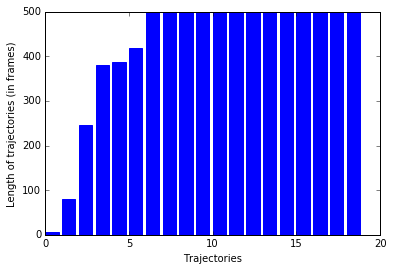

2016-06-29 14:48:46,912 - htmd.metricdata - INFO - Dropped 6 trajectories from 19 resulting in 13
/home/alejandro/miniconda3/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:1300: RuntimeWarning: init_size=300 should be larger than k=1000. Setting it to 3*k
  init_size=init_size)
2016-06-29 14:48:49,004 - htmd.metricdata - INFO - Mergesmall removed 356 clusters. Original ncluster 380, new ncluster 24.


29-06-16 14:48:49 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[4] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


2016-06-29 14:48:49,554 - pyemma.msm.estimators.implied_timescales.ImpliedTimescales[4] - WARNING - Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


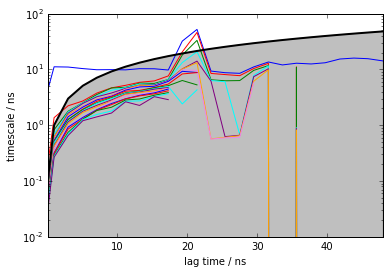

At which time do time scales converge?20
How many different time scales do you see?2


2016-06-29 14:49:05,680 - htmd.model - INFO - 7.4% of the data was used
2016-06-29 14:49:05,683 - htmd.model - INFO - Number of trajectories that visited each macrostate:
2016-06-29 14:49:05,684 - htmd.model - INFO - [4 6]
[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done   2 tasks       | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s finished
2016-06-29 14:49:07,924 - htmd.kinetics - INFO - Detecting source state...
2016-06-29 14:49:07,930 - htmd.kinetics - INFO - Guessing the source state as the state with minimum contacts.
2016-06-29 14:49:07,931 - htmd.kinetics - INFO - Source macro = 1
2016-06-29 14:49:07,931 - htmd.kinetics - INFO - Detecting sink state...
2016-06-29 14:49:07,932 - htmd.kinetics - INFO - Sink macro = 0
[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done   2 tasks       | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s finished


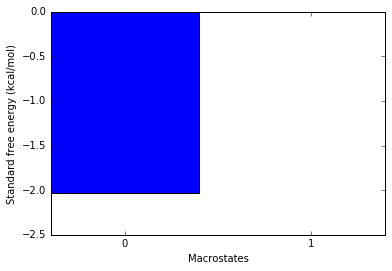

2016-06-29 14:49:10,191 - htmd.simlist - INFO - Starting listing of simulations.


Path flux		%path	%of total	path
0.04677259339365655	100.0%	100.0%		[1 0]
['./choline/filtered/e2s2_1p0f137/', './choline/filtered/1/', './choline/filtered/3/', './choline/filtered/e2s3_4p0f308/', './choline/filtered/2/', './choline/filtered/4/', './choline/filtered/e2s6_5p0f11/', './choline/filtered/e2s4_5p0f6/', './choline/filtered/5/', './choline/filtered/e2s7_5p0f12/', './choline/filtered/e2s8_5p0f15/', './choline/filtered/e2s5_5p0f7/', './choline/filtered/e2s1_5p0f9/'] ['./choline/filtered//filtered.pdb']
Creating simlist: 100% (13/13) [###################################] eta 00:01 |

2016-06-29 14:49:10,200 - htmd.simlist - INFO - Finished listing of simulations.
2016-06-29 14:49:10,361 - htmd.projections.metric - INFO - Metric: Starting projection of trajectories.


[Parallel(n_jobs=-2)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-2)]: Done   3 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-2)]: Done   4 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-2)]: Done   5 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-2)]: Done   6 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-2)]: Done   7 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-2)]: Done   8 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-2)]: Done  13 out of  13 | elapsed:    2.0s finished
2016-06-29 14:49:12,545 - htmd.projections.metric - INFO - Finished projecting the trajectories.
2016-06-29 14:49:12,547 - htmd.projections.metric - WARNING - Multiple framesteps were read from the simulations. Taking the statistical mode: 0.0ns. If it looks wrong, you can modify it by manually setting the MetricData.fstep property.


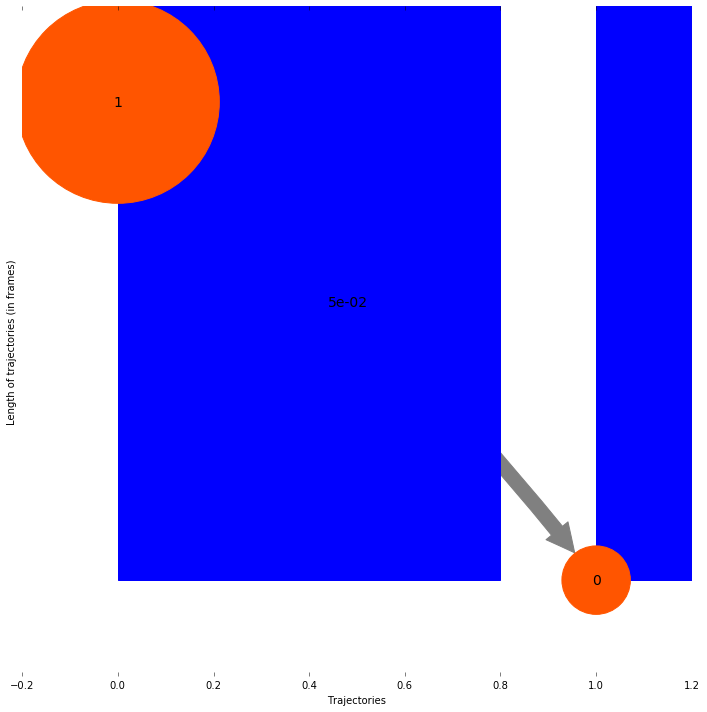

2016-06-29 14:49:12,841 - htmd.metricdata - INFO - Dropped 4 trajectories from 13 resulting in 9
/home/alejandro/miniconda3/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:1300: RuntimeWarning: init_size=300 should be larger than k=1000. Setting it to 3*k
  init_size=init_size)
2016-06-29 14:49:16,894 - htmd.metricdata - INFO - Mergesmall removed 72 clusters. Original ncluster 75, new ncluster 3.


29-06-16 14:49:17 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[6] WARNING  Changed user setting nits to the number of available timescales nits=2


2016-06-29 14:49:17,235 - pyemma.msm.estimators.implied_timescales.ImpliedTimescales[6] - WARNING - Changed user setting nits to the number of available timescales nits=2


29-06-16 14:49:17 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[6] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


2016-06-29 14:49:17,237 - pyemma.msm.estimators.implied_timescales.ImpliedTimescales[6] - WARNING - Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


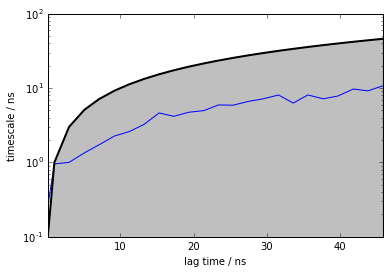

At which time do time scales converge?10
How many different time scales do you see?1


2016-06-29 14:49:28,373 - htmd.model - INFO - 100.0% of the data was used
2016-06-29 14:49:28,376 - htmd.model - INFO - Number of trajectories that visited each macrostate:
2016-06-29 14:49:28,376 - htmd.model - INFO - [7]
[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished
2016-06-29 14:49:30,087 - htmd.kinetics - INFO - Detecting source state...
2016-06-29 14:49:30,101 - htmd.kinetics - INFO - Guessing the source state as the state with minimum contacts.
2016-06-29 14:49:30,102 - htmd.kinetics - INFO - Source macro = 0
2016-06-29 14:49:30,102 - htmd.kinetics - INFO - Detecting sink state...





 Trajectories are to small. Starting analysis for next folder.





In [3]:
%pylab inline
all_molecules=list()
all_dir=glob('./*/filtered/')
for directory in all_dir:
    try:
        print(glob(directory+'*/'), glob(directory+'/filtered.pdb'))
        sims = simlist(glob(directory+'*/'), glob(directory+'/filtered.pdb'))
        all_molecules.append(analysis(sims,boot=0.5,clusters=1000,merge=5)) #0.2 makes ethanol work
    except:
        print('\n\n\n Trajectories are to small. Starting analysis for next folder.\n\n\n')
        continue

In [ ]:
print(all_molecules)